# Introduction

This project is to analyze the data from biodiversity parks about various species which are present and their conservation statuses. 

**Data Sources:**

The main sources of data are contained in the files -

`observations.csv` and `species_info.csv` provided by Codecademy

observations.csv file contains 3 columns - scientific name,park name,observation(count)

species_info.csv file contains 3 columns(about various species) - category,scitific name,common name and conservation status

## Project Goals

The main questions which the this projects aims to answer is:
 - What are the conservation statuses of different categories of species ?
 - Are the differences between species and conservations status significantly different ?
 - What is the conservation status for same genus species ?  
  Eg: Do all 'canis' genus species have same conservations status like 'endangered' or are they different
  

## Importing required python modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Loading Data

Storing the `observations.csv` file as obs dataframe and `species_info.csv` as sp dataframe

In [2]:
obs= pd.read_csv('observations.csv')
sp= pd.read_csv('species_info.csv')
print(obs.head())
print(sp.head())
print("\n\nThe size of the observation.csv file is ",obs.shape)
print("The size of the species_info.csv file is ",sp.shape)


            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic 

## Observations

The file observations.csv contains the columns:

  - `scientific_name`: The scientific name of the species
  - `park_name`: The name of the biodiversity park
  - `observation`: The number of species in that park

The file species_info.csv contains the columns:

  - `category` : The class of the species
  - `scientific_name`: The scientific name of the species
  - `common_names`: The common name of the species
  - `conservation_status`: The current conservation status of the species

## Exploratory Data Analysis

We are going to get a basic overview/look at our data 

In [3]:
print(f"The unique species are {sp.scientific_name.nunique()}")
print("The number of unique species in observation.csv are:",obs.scientific_name.nunique())

The unique species are 5541
The number of unique species in observation.csv are: 5541


### Observations

From this we can see that there is no missing information about any species in both the files

Next let's take a look at the different categories of species present

In [4]:
print(f"The number of different categories are: {sp.category.nunique()}")
print(f"The different categories of species are: {sp.category.unique()}")
sp.groupby('category').size()

The number of different categories are: 7
The different categories of species are: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

### Observations

The species in our dataset are arranged into 7 different categories which are: Mammal,Bird,Reptile,Amphibian,Fish,Vascular Plant,Nonvascular plant.

Let's take a look at different biodiversity parks the data was collected from

In [5]:
print(f"The number of different parks the data was collected from are:{obs.park_name.nunique()}")
obs.park_name.unique()


The number of different parks the data was collected from are:4


array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

In [6]:
print(f"The different conservation statuses are {sp.conservation_status.unique()}")

The different conservation statuses are [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


### Observation

Looks like the species which dont come under: 'Species of Concern','Endangered,'Threatened','In Recovery' are left are nan in our dataset

In [7]:
print("The number of nan values are",sp.conservation_status.isna().sum())
print(sp.groupby('conservation_status').size())

The number of nan values are 5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


# Data Cleaning and Data Wrangling

The data in the files is clean from our EDA we are going to fill all the nan values in observation coulmn to No Intervention.  
Next we are going to rename our obsevations column to count as it gives us a better idea of what we are dealing with.

In [8]:
obs.rename(columns={"observations":'count'},inplace=True)
print(obs.head())
sp.conservation_status.fillna("No Intervention",inplace=True)
print(sp.head())

            scientific_name                            park_name  count
0        Vicia benghalensis  Great Smoky Mountains National Park     68
1            Neovison vison  Great Smoky Mountains National Park     77
2         Prunus subcordata               Yosemite National Park    138
3      Abutilon theophrasti                  Bryce National Park     84
4  Githopsis specularioides  Great Smoky Mountains National Park     85
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole     No Intervention  
1                              American Bison, Bison     No Intervention  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...     No Intervention

Another Thing which we are going to see later is number of duplicates present in species csv file.The number of lines is 5824 but the number of unique species are 5541 which indicates that there might be some rows which are repeated.

# Analysis

Let's begin with our analysis by trying to answer questions

# Question 1

What are the conservation statuses of different categories of species?

To Answer this let's create a stacked boxplot of conservation values as x values and lets stack the categories on top of bar plot


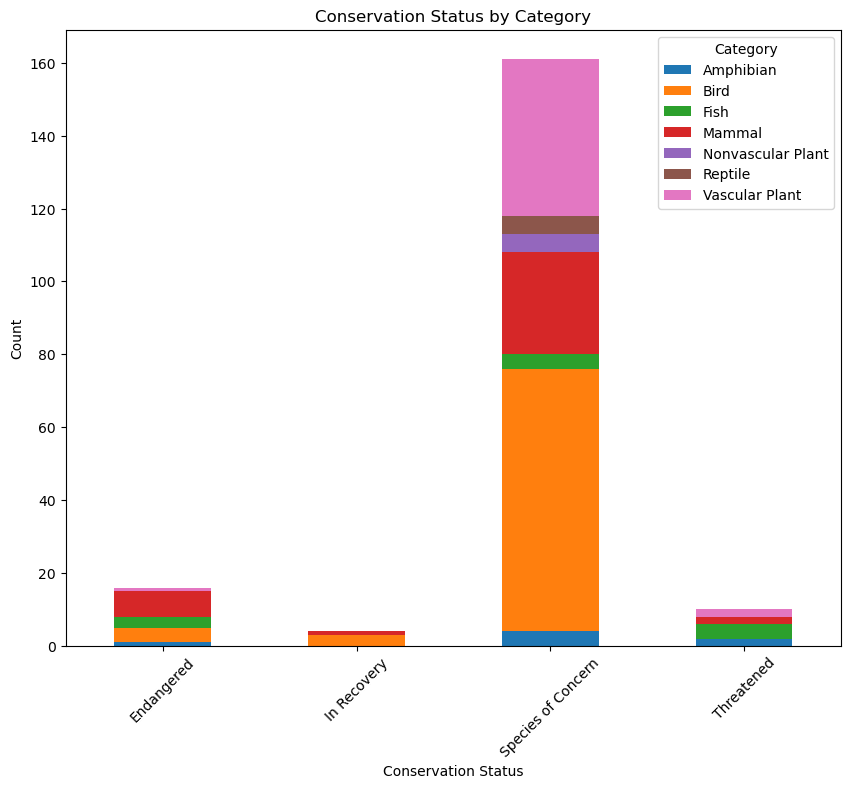

In [9]:
cons=sp[sp.conservation_status != 'No Intervention'].groupby(['conservation_status','category']).size().unstack(fill_value=0)
#creating a bar plot
cons.plot(kind='bar',stacked=True,figsize=(10,8))
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.title('Conservation Status by Category')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()
plt.close()

### Observation 

+ The reason why we did not select species which have no intervention is because the number is unproportionatly high which would make it very difficult to see the number of species in other conservation statuses
+ The number of species under the category of species of Concern is the the highest with birds forming the major part.
+ This number is folled by endangered species here the number of mammals is the highest.Followed by threatened and at last in recovery

# Statistical Significance(Question 2):

The Next question which we are going to answer is :  
Are the differences between species and their conservation status significantly different?

To answer the question we are going to use Chi square tests on our data:-  

First, we are going to find the number of protected vs number of not protected species under each category.  

Next, we are going to compare the protected number for Mammals vs Birds, Mammals vs Fish and Vascular vs Non Vascular plants

In [10]:
sp['pr']=sp.conservation_status != "No Intervention"
prot = sp.groupby(['category', 'pr']).scientific_name.nunique().reset_index().pivot(columns='pr',index='category',values='scientific_name').reset_index()
prot.columns = ['category', 'not_protected', 'protected']
prot

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


## Chi Square test

### Test 1: Mammals Vs Birds  
Here we will initialise our values as [[413,75],[146,30]] the first row is for Birds and the and the second is for Mammals

In [11]:
ar= [[413,75],[146,30]]
table1= chi2_contingency(ar)
table1

Chi2ContingencyResult(statistic=0.16170148316545574, pvalue=0.6875948096661336, dof=1, expected_freq=array([[410.8313253,  77.1686747],
       [148.1686747,  27.8313253]]))

The p-value is 0.687 which is greater than standard statistical significance 0.05 which tells us that there is no relationship between mammals and birds.  

### Test 2: Mammals Vs Fish
Here we will initialise our values as [[115,11],[146,30]] the first row is for Fish and the and the second is for Mammals

In [12]:
ar=[[115,11],[146,30]]
sta,p_val,dof,freq=chi2_contingency(ar)
p_val

0.0561483484489001

Here we get a p-value = 0.056 which is just slightly higher than stand statistical significance of 0.05 this might indicate that there might be a difference in conservation rates, Mammals do require more protection than fish.

### Test 3 : Vascular vs Non Vascular Plants
Here we will initialise our values as [[328,5],[4216,46]] the first row is for Non Vascular Plants and the and the second is for Vascular Plants

In [13]:
ar=[[328,5],[4216,46]]
sta,p_val,dof,freq=chi2_contingency(ar)
p_val

0.6623419491381985

Here the p-value is 0.66 which is definitely higher than our threshold significance which suggests us that there is no significance difference in conservation of plants.

# Question 3

What is the conservation statuses of same genus species.(Genus is collection of related species on the heirarchial level of arrangment of species it is the one above species).

First, Let's print all the duplicates

In [14]:
df= sp.sort_values(by='scientific_name')
dup=df[df.duplicated(subset=['scientific_name'],keep=False)]
dup

,category,scientific_name,common_names,conservation_status,pr
5553,Vascular Plant,Agrostis capillaris,"Colonial Bent, Colonial Bentgrass",No Intervention,False
2132,Vascular Plant,Agrostis capillaris,Rhode Island Bent,No Intervention,False
5554,Vascular Plant,Agrostis gigantea,"Black Bent, Redtop, Water Bentgrass",No Intervention,False
2134,Vascular Plant,Agrostis gigantea,Redtop,No Intervention,False
2136,Vascular Plant,Agrostis mertensii,Northern Agrostis,No Intervention,False
...,...,...,...,...,...
2330,Vascular Plant,Vulpia myuros,Rattail Fescue,No Intervention,False
4290,Vascular Plant,Vulpia octoflora,"Eight-Flower Six-Weeks Grass, Pullout Grass, S...",No Intervention,False
2331,Vascular Plant,Vulpia octoflora,Annual Fescue,No Intervention,False
632,Vascular Plant,Zizia aptera,Golden Alexanders,No Intervention,False


In [15]:
#Deleting all the duplicate names
df.drop_duplicates(subset=['scientific_name'],inplace=True)
#Finding all genuses now with more than 1 species in them
df[["genus","species"]] = df['scientific_name'].str.split(" ",expand=True,n=1)
gen=df.groupby("genus").species.nunique().reset_index()
gen = gen[gen.species>1]
gen

,genus,species
0,Abies,3
4,Acalypha,4
6,Accipiter,3
7,Acer,14
8,Achillea,2
...,...,...
1589,Zapus,2
1591,Zigadenus,5
1592,Zizia,3
1593,Zonotrichia,6


### Observation

There seems to be 802 genera with more than 1 species in them.  
We will now see in how many of these genera the species have different conservation status and vice versa.

In [16]:
#Defining a function to find the status of a all species in a genus
def fun(x):
    y= df[df.genus == x]
    for index,row in y.iterrows():
        prev_con= ""
        if prev_con == "":
           prev_con=row.conservation_status 
        else:
            if prev_con != row.conservation_status:
                return False
            else:
                prev_con=row.conservation_status    
    return True
gen["status"]=df.genus.apply(fun)
gen["status"].fillna(False, inplace=True)
gen

,genus,species,status
0,Abies,3,True
4,Acalypha,4,False
6,Accipiter,3,True
7,Acer,14,True
8,Achillea,2,False
...,...,...,...
1589,Zapus,2,True
1591,Zigadenus,5,True
1592,Zizia,3,True
1593,Zonotrichia,6,True


Now let's plot this data to see how many genera have the same status and how many have different statuses

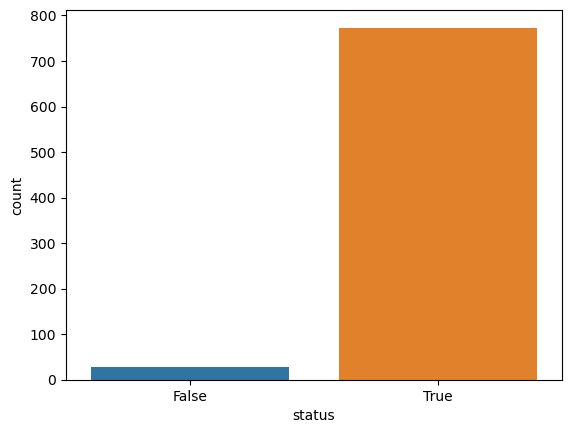

In [17]:
sns.countplot(x='status',data=gen)
plt.show()
plt.close()

### Observation

As we can see here most of the genera have same conservation status in its species be it Endangered,In Recovery or No Intervention etc.This goes to show us the is a relation in which they are being treated. (Eg:- Hunting species under one genera might be more common than other which might lead to all the species in that genus being endangered).

In [18]:
import re
name = input("Enter the common name for species you are searching for")
#converting common_names column to string type for ease
df['common_names']=df['common_names'].astype('string')
sel=df.scientific_name[df.common_names.apply(lambda x:bool(re.search(name,x,re.IGNORECASE)))]
if sel.empty:
    print("No matches found")
else:
    if sel.count()>1:
        print(f"{sel.count()} species were found with the common name, which are:\n",sel)
    else:
        print("1 species with that common name was found, which is\n",sel)
    parks=obs[obs.scientific_name.isin(sel)]
    parks.sort_values(by="count",ascending= False)
    print("The parks are arranged in order of decreasing count")
    print(parks.groupby("scientific_name")[['scientific_name',"park_name"]].head()) 


' import re\nname = input("Enter the common name for species you are searching for")\ndf[\'common_names\']=df[\'common_names\'].astype(\'string\')\nsel=df.scientific_name[df.common_names.apply(lambda x:bool(re.search(name,x,re.IGNORECASE)))]\nif sel.empty:\n    print("No matches found")\nelse:\n    if sel.count()>1:\n        print(f"{sel.count()} species were found with the common name, which are:\n",sel)\n    else:\n        print("1 species with that common name was found, which is\n",sel)\n    parks=obs[obs.scientific_name.isin(sel)]\n    parks.sort_values(by="count",ascending= False)\n    print("The parks are arranged in order of decreasing count")\n    print(parks.groupby("scientific_name")[[\'scientific_name\',"park_name"]].head()) '

Enter a the National park name
Options:
 ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


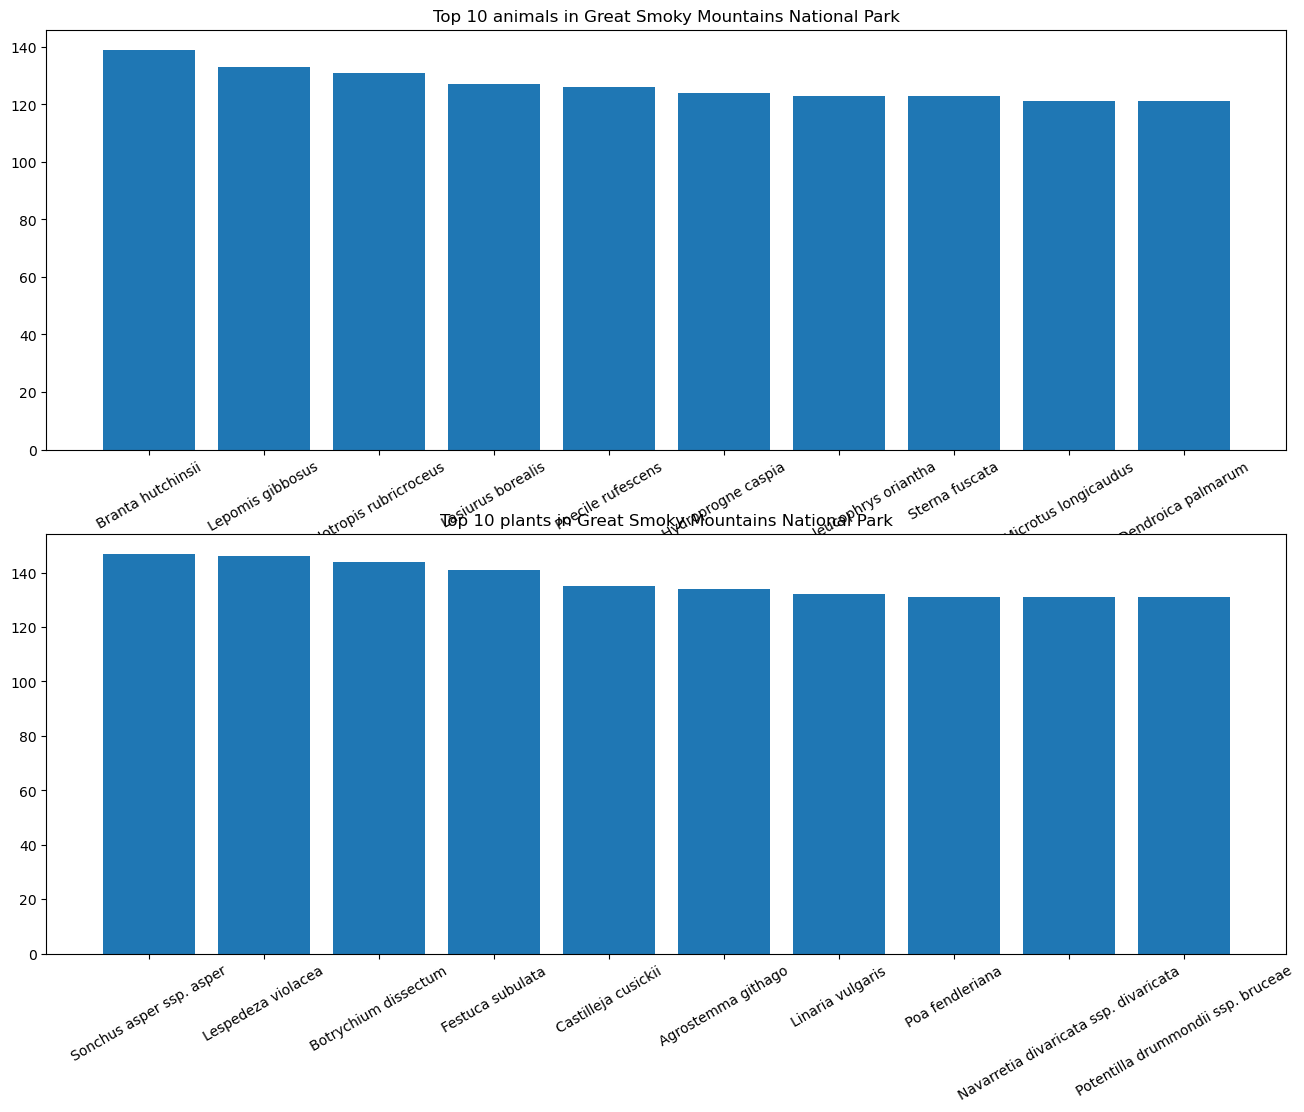

In [43]:
#defining a function which is used to check if a species is an animal or a plant
def fun2(x):
    y=sp[sp.scientific_name==x]
    if 'Vascular Plant' in y.category.unique() or 'Nonvascular Plant' in y.category.unique():
        return False
    else:
        return True
#deleting all the duplicates
obs.drop_duplicates(subset=["scientific_name","park_name"],inplace=True)
#Creating a column isani which tells us whether a species is an animal or not
obs['isani']=obs.scientific_name.apply(fun2)
print("Enter a the National park name\nOptions:\n",obs.park_name.unique())
pn=input("")
pl=obs[obs.park_name==pn]

#Each National park has a lot of different species with almost same number Let's split into plants and animals
pla=pl[pl.isani == True].nlargest(10,"count")
plp=pl[pl.isani == False].nlargest(10,"count")

plt.figure(figsize=(16,12))
# Subplot for animals
ax1 = plt.subplot(2, 1, 1)
ax1.set_title(f"Top 10 animals in {pn}")
ax1.bar(range(len(pla)), pla['count'])
ax1.set_xticks(range(len(pla)))
ax1.set_xticklabels(pla.scientific_name, rotation=30)

# Subplot for plants
ax2 = plt.subplot(2, 1, 2)
ax2.set_title(f"Top 10 plants in {pn}")
ax2.bar(range(len(plp)), plp['count'])
ax2.set_xticks(range(len(plp)))
ax2.set_xticklabels(plp.scientific_name, rotation=30)


# Adjusting layouts to prevent overlap
plt.tight_layout(pad=3.0)
plt.show()
plt.close()


# Conclusions:  

### What are the conservation statuses of different categories of species ?  

+ Although there seemed to be significant species which need to be under conservation there are a lot more of them with no intervention
+ Most of the species which need to be conserved fall under species of concern category (with birds forming the majority)  

### Are the differences between species and conservations status significantly different ?  

+ We performed chi square test for 3 different groups: Mammals Vs Birds ,Mammals Vs Fish and Vascular Plants Vs Non Vascular plants
+ We found no relationship in conservation differences between Mammals Vs Birds and Vascular Plants Vs Non Vascular plants,but there was a significant difference between Mammals Vs Fish 

### What is the conservation status for same genus species ?  
  Eg: Do all 'canis' genus species have same conservations status like 'endangered' or are they different

+ We found out that the most of the genuses have the same conservation status, which is something one would expect because species of same genera share quite a few similar features which might cause a specific genera to be targeted for hunting etc.
